# Assignment 4
Training a simple neural net for relation classification.

In [ ]:
import torch
import torch.nn as nn
!pip install transformers

In this assignment you are required to build a full training and testing pipeline for a neural relation classification (RC), using BERT.

The dataset that you will be working on is called SemEval Task 8 dataset (https://arxiv.org/pdf/1911.10422v1.pdf). The dataset contain only train and test split, but you are allowed to split the train dataset into dev if needed.


The two files (train and test) are available from the course git repository (https://github.com/kfirbar/nlp-course)


In this work we will use the hugingface framework for transformers training and inference. We recomand reading the documentation in https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification *before* you start coding. 


**Task 1:** Write a funtion *read_data* for reading the data from a single file (either train or test). This function recieves a filepath and returns a list of sentence. Every sentence is encoded as a touple, where the first element is the sentence string and the second the label (also represented as a sting). 

In [ ]:

def read_data(filepath):
    data = []
    # TODO... write your code accordingly 

    return data

!git clone https://github.com/kfirbar/nlp-course
train = read_data('/content/nlp-course/TRAIN_FILE.TXT')
test = read_data('/content/nlp-course/TEST_FILE.txt')


Cloning into 'nlp-course'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 62 (delta 25), reused 31 (delta 8), pack-reused 0
Unpacking objects: 100% (62/62), done.


Pytorch require the labels to be integers. Create a mapper (dictionary) from the string labels to integers (starting zero). 

In [ ]:
def create_label_mapper(data):
  # TODO... write your code accordingly 

create_label_mapper(train):
            

**Task 2:** Write a function *prepare_data* that takes one of the [train, test] datasets and convert each pair of (words,labels) to a pair of indexes. The function also aggregate the samples into batches. BERT Uses pretrained tokanization and embedding. you can access the tokanization and indexing using the BertTokenizer class.

In [ ]:
from transformers import BertTokenizer

def prepare_data(data, tokenizer, batch_size=8):
    data_sequences = []
    # TODO - your code...

    return data_sequences
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_sequences = prepare_data(train, tokenizer)
test_sequences = prepare_data(test, tokenizer)

**Task 3:** In this part we classify the sentences using the BertForSequenceClassification model. To save resources, we initialize the optimizer with the final layer of the model. You are also allowed to change the learning rate.

In [ ]:
def get_parameters(params):
  # TODO - your code...
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Optimizer (ADAM is a fancy version of SGD)
optimizer = torch.optim.Adam(get_parameters(model.named_parameters()), lr=0.0001)

**Task 4:** Write a training loop, which takes a BertForSequenceClassification model and number of epochs to train on. The loss is always CrossEntropyLoss and the optimizer is always Adam. You are allowed to split the train to train and dev sets.

In [ ]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
def train_loop(model, n_epochs, train_data, dev_data):
  # Loss function
  criterion = nn.CrossEntropyLoss()
 
  for e in range(1, n_epochs + 1):
    # TODO - your code goes here...



**Task 5:** write an evaluation loop on a trained model, using the dev and test datasets. This function print the true positive rate (TPR), also known as Recall and the opposite to false positive rate (FPR), also known as precision, of each label seperately (10 labels in total), and for all labels together. The caption argument for the function should be served for printing, so that when you print include it as a prefix.

In [ ]:
def evaluate(model, test_data):
  # TODO - your code goes here
  print(...)

**Task 6:** In this part we'll improve the model accuracy by using a method called "entity markers - Entity start". The main idea of this approch is to add special markers ([e1], [\e1], ...) before and after each of the tagged entities. instead of using the CLS toekn for clasification, we will use the concatination of the embedding of [e1] and [e2] as shown in the image below. The complete method is described in details in the following paper - https://arxiv.org/pdf/1906.03158.pdf (specifically in Section 3.2). To use this method we'll need to create a new data load and a new model.

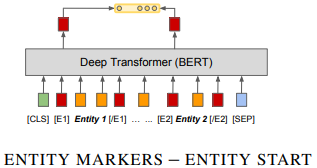

The new methods require the usage of special tokens. The following code will add the required tokens.

In [ ]:
tokenizer.add_tokens(['[E1]', '[/E1]', '[E2]', '[/E2]')

Create a new dataloader that add entity markers to the dataset and return their indexes as part of the new sample (the expected sample should be (s, l, i) where s is the sentence embedding, l is the label, and i is a touple with the indexes of the start entities)

In [ ]:
def prepare_data_MTB(data, tokenizer, batch_size=8):
    data_sequences = []
    # TODO - your code...

    return data_sequences

train_sequences = prepare_data_MTB(train, tokenizer)
test_sequences = prepare_data_MTB(test, tokenizer)

Create a new model that uses the "entity markers - Entity start" method.

In [ ]:
class MTB(nn.Module):
    def __init__(self, base_model_name):
      config = AutoConfig.from_pretrained(name)
      self.model = AutoModel.from_config(config)
      # TODO - your code...
    def forward(self, input, index):
      # TODO - your code...
model = MTB('bert-base-uncased')

Use the new dataloader and model to train and evaluate the new model as in task 4 and 5

In [ ]:
train_loop(model, n_epochs, train_data, dev_data)
evaluate(model, test_data)


**Good luck!**